<a href="https://colab.research.google.com/github/Geetika2282/NLP-AI/blob/main/labpractice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1

In [ ]:
#!pip install opencv-python matplotlib numpy

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# Step 1: Read the sample image
image = cv2.imread('sample.jpg', cv2.IMREAD_COLOR)  # Replace with the actual image path

# Convert BGR to RGB for displaying in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 2: Apply the filters
# Median filter with a kernel size of 5x5
median_filtered = cv2.medianBlur(image, 5)

# Gaussian filter with a kernel size of 5x5 and standard deviation of 1
gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 1)

# Convert filtered images to RGB for displaying
median_filtered_rgb = cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB)
gaussian_filtered_rgb = cv2.cvtColor(gaussian_filtered, cv2.COLOR_BGR2RGB)


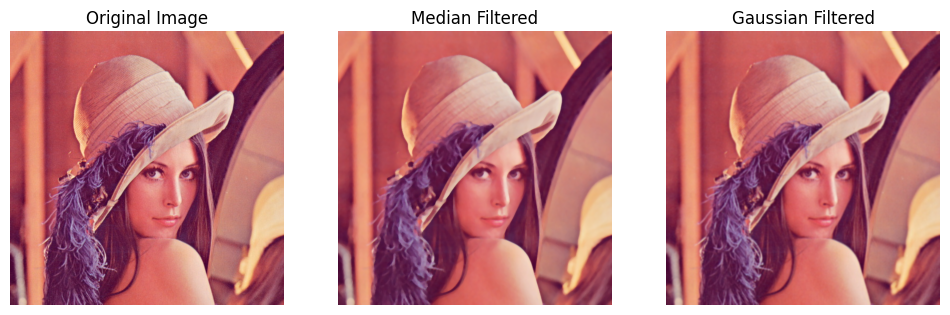

In [ ]:

# Step 3: Display the original and filtered images side by side
plt.figure(figsize=(12, 4))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Median Filtered image
plt.subplot(1, 3, 2)
plt.imshow(median_filtered_rgb)
plt.title('Median Filtered')
plt.axis('off')

# Gaussian Filtered image
plt.subplot(1, 3, 3)
plt.imshow(gaussian_filtered_rgb)
plt.title('Gaussian Filtered')
plt.axis('off')

plt.show()


In [ ]:

# Step 4: Save both filtered images to separate files
cv2.imwrite('median_filtered_image.jpg', median_filtered)
cv2.imwrite('gaussian_filtered_image.jpg', gaussian_filtered)


True

# Q2

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Read the sample image and convert it to grayscale
image = cv2.imread('sample.jpg', cv2.IMREAD_COLOR)  # Replace with your actual image path
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply the Sobel operator to detect vertical and horizontal edges
# Sobel operator for vertical edges (detects edges in the x-direction)
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)

# Sobel operator for horizontal edges (detects edges in the y-direction)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

# Step 3: Combine the vertical and horizontal edges into a single edge-detected image
edges = cv2.magnitude(sobel_x, sobel_y)

# Convert the result to a suitable format for display
# edges = np.uint8(np.absolute(edges))

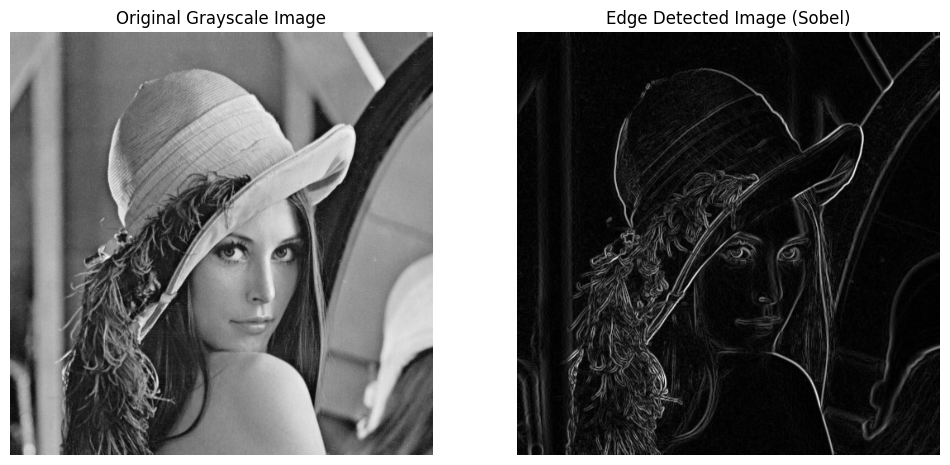

In [ ]:
# Step 4: Display the original grayscale image and the edge-detected image side by side
plt.figure(figsize=(12, 6))

# Original grayscale image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detected Image (Sobel)')
plt.axis('off')

plt.show()

In [ ]:
# Step 5: Save the edge-detected image to a file
cv2.imwrite('edge_detected_image.jpg', edges)

True

# Q3

In [ ]:
#!pip install nltk gensim pandas

In [ ]:
import nltk
import gensim
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [ ]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Step 1: Preprocess the text
def preprocess_text(file_path):
    # Read the text file
    with open(file_path, 'r') as file:
        text = file.read().lower()  # Convert to lowercase

    # Tokenization: Split text into words
    tokens = word_tokenize(text)

    # Removing punctuation and filtering out non-alphabetical tokens
    tokens = [word for word in tokens if word.isalpha()]

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return lemmatized_tokens

# Step 2: Train Word2Vec model on preprocessed text
def train_word2vec(tokens):
    # Create Word2Vec model
    model = gensim.models.Word2Vec(sentences=[tokens], vector_size=100, window=5, min_count=1, sg=0)
    return model

# Step 3: Get Word Embeddings for 5 unique words
def get_word_embeddings(model, words):
    embeddings = {}
    for word in words:
        if word in model.wv:
            embeddings[word] = model.wv[word]
    return embeddings

# Step 4: Save embeddings to CSV
def save_embeddings_to_csv(embeddings, filename):
    df = pd.DataFrame(embeddings).T  # Transpose to get words as rows
    df.to_csv(filename)


In [ ]:
# Preprocess the text
file_path = 'sample.txt'  # Replace with your file path
preprocessed_tokens = preprocess_text(file_path)


In [ ]:
# Train Word2Vec model
word2vec_model = train_word2vec(preprocessed_tokens)

# Choose 5 unique words to display embeddings for (ensure the words are in the vocabulary)
# words_to_check = ['example', 'text', 'word', 'model', 'data']  # Replace with actual words from your text
words_to_check = preprocessed_tokens[8:13]  # Replace with actual words from your text

print(words_to_check)


['female', 'jonnie', 'doe', 'janie', 'doe']


In [ ]:
embeddings = get_word_embeddings(word2vec_model, words_to_check)

# Display the word embeddings
for word, embedding in embeddings.items():
    print(f"Word: {word}")
    print(f"Embedding: {embedding[:5]}...")  # Display first 5 dimensions for brevity
    print()

# Save the word embeddings to a CSV file
save_embeddings_to_csv(embeddings, 'word_embeddings.csv')

Word: female
Embedding: [ 0.00020059  0.00219394  0.00107122  0.00754285 -0.00438594]...

Word: jonnie
Embedding: [ 0.00697183 -0.00018815 -0.00794121  0.00888061 -0.00853514]...

Word: doe
Embedding: [-0.00058443  0.00045694  0.00512384  0.00882209 -0.00921926]...

Word: janie
Embedding: [-0.00335706 -0.00686042  0.00650864  0.00936873  0.00830842]...



# Q4

In [ ]:
#!pip install pandas scikit-learn nltk


In [ ]:
import pandas as pd
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

In [ ]:
# Download necessary NLTK resources
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords


In [ ]:
# Step 1: Load the IMDB dataset
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Step 2: Preprocess the text
def preprocess_text(text):
    # Remove special characters, convert to lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags if any
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert text to lowercase
    return text

# Apply the text preprocessing to the review column
df['review'] = df['review'].apply(preprocess_text)

In [ ]:
# Step 3: Tokenization and Padding
# We can use CountVectorizer to tokenize and vectorize the text
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), max_features=5000)

X = vectorizer.fit_transform(df['review'])  # Convert reviews to a matrix of token counts
y = np.where(df['sentiment'] == 'positive', 1, 0)  # Convert sentiment to 1 for positive, 0 for negative

In [ ]:

# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 5: Build a binary classification model
# You can choose either Logistic Regression or Naive Bayes.
# Here, we use Naive Bayes as an example.

model = MultinomialNB()  # Naive Bayes classifier
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:

# Step 6: Make predictions
y_pred = model.predict(X_test)

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
# Save predictions to a CSV file
# predictions_df = pd.DataFrame({'review': df['review'].iloc[y_test.index], 'Predicted Sentiment': y_pred})
predictions_df = pd.DataFrame({'review': df['review'].iloc[y_test], 'Predicted Sentiment': y_pred})
predictions_df.to_csv('predictions.csv', index=False)

In [ ]:
# Step 7: Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the accuracy and confusion matrix
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 84.83%
Confusion Matrix:
[[4226  735]
 [ 782 4257]]
